<h1> L2 Ridge reguralization feature selection method</h1>

In [1]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from timeit import default_timer
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_preprocessed = pd.read_excel("game_reviews_preprocessed.xlsx", index_col=0)

In [3]:
df_preprocessed

,review,voted_up
37439,zeskalowanie świat tracić niemal zupełnie sens...,False
1414,totalny dno kolejka hdodanie serwer wcale nie ...,False
12728,dobra typ gracz nudzić samotny biegać kopalnia...,True
11891,fajny poczuć pikselowym świat otoczyć szlam zo...,True
20635,raz zaczynać sezon niepotrzebny stres niepotrz...,False
...,...,...
37771,tył czas zmarnować internet cholerstwo nie chc...,False
73100,skórka cena gem tragedia dobierać gracz meczeć...,False
4761,ciągły wywalać kolejka kolejka kompania gracz ...,False
41470,naprawdę nieudany postać sporo tył odblokować ...,False


In [4]:
df_preprocessed.drop_duplicates(subset=['review'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df_preprocessed['review'], df_preprocessed['voted_up'], test_size=0.3, random_state=42)

In [5]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train = vectorizer.fit_transform(X_train)
tfidf_tokens = vectorizer.get_feature_names()

print(X_train.shape)
X_train = pd.DataFrame(X_train.toarray(), columns=tfidf_tokens)
X_train.head()

(2554, 116113)


,aaaale,aaaale drzewko,aberration,aberration znajdować,ability,ability draft,abnegacki,abnegacki cieć,abo,abo zacząć,...,żółty zwłaszcza,żółty światło,żółw,żółw stawiać,żółw wracać,żółwik,żółwik wyglądać,żądać,żądać rekompensata,żądać zwrot
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X_test = vectorizer.transform(X_test)
# tfidf_tokens = vectorizer.get_feature_names()

print(X_test.shape)
X_test = pd.DataFrame(X_test.toarray(), columns=tfidf_tokens)
X_test.head()

(1095, 116113)


,aaaale,aaaale drzewko,aberration,aberration znajdować,ability,ability draft,abnegacki,abnegacki cieć,abo,abo zacząć,...,żółty zwłaszcza,żółty światło,żółw,żółw stawiać,żółw wracać,żółwik,żółwik wyglądać,żądać,żądać rekompensata,żądać zwrot
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3> MultinomialNB </h3>

In [7]:
# param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# model = GridSearchCV(MultinomialNB(), param_grid, verbose=0)
model = MultinomialNB()
model.fit(X_train,y_train)

start = default_timer()
y_pred = model.predict(X_test)
end = default_timer()
print(end - start)

score = accuracy_score(y_test,y_pred)
print(score)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

1.1276359000000014
0.8584474885844748
              precision    recall  f1-score   support

       False       0.81      0.92      0.87       539
        True       0.91      0.80      0.85       556

    accuracy                           0.86      1095
   macro avg       0.86      0.86      0.86      1095
weighted avg       0.86      0.86      0.86      1095

[[497  42]
 [113 443]]


<h3> SVC </h3>

In [7]:
# param_grid = {'C': [1, 10, 100, 1000],
#             'gamma': [1, 0.1, 0.01, 0.001]}

# model = GridSearchCV(SVC(), param_grid, verbose=3)
model = SVC(kernel="linear")

model.fit(X_train,y_train)

start = default_timer()
y_pred = model.predict(X_test)
end = default_timer()
print(end - start)

score = accuracy_score(y_test,y_pred)

print(score)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

240.92914199999996
0.8611872146118722
              precision    recall  f1-score   support

       False       0.84      0.89      0.86       539
        True       0.89      0.83      0.86       556

    accuracy                           0.86      1095
   macro avg       0.86      0.86      0.86      1095
weighted avg       0.86      0.86      0.86      1095

[[482  57]
 [ 95 461]]


<h3> LogisticRegression </h3>

In [9]:
# param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#             'penalty': ['l1', 'l2', 'elasticnet', 'none']}

# model = GridSearchCV(LogisticRegression(), param_grid, verbose=0)
model = LogisticRegression()
model.fit(X_train,y_train)

start = default_timer()
y_pred = model.predict(X_test)
end = default_timer()
print(end - start)

score = accuracy_score(y_test,y_pred)

print(score)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

1.012772699999914
0.8447488584474886
              precision    recall  f1-score   support

       False       0.80      0.91      0.85       539
        True       0.90      0.79      0.84       556

    accuracy                           0.84      1095
   macro avg       0.85      0.85      0.84      1095
weighted avg       0.85      0.84      0.84      1095

[[488  51]
 [119 437]]


<h3>RandomForestClassifier</h3>

In [10]:
# param_grid = {'n_estimators': [100, 200, 400, 600]}

# model = GridSearchCV(RandomForestClassifier(), param_grid, verbose=0)
model = RandomForestClassifier()
model.fit(X_train,y_train)

start = default_timer()
y_pred = model.predict(X_test)
end = default_timer()
print(end - start)

score = accuracy_score(y_test,y_pred)
print(score)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

1.2469912999999906
0.8319634703196347
              precision    recall  f1-score   support

       False       0.83      0.83      0.83       539
        True       0.83      0.83      0.83       556

    accuracy                           0.83      1095
   macro avg       0.83      0.83      0.83      1095
weighted avg       0.83      0.83      0.83      1095

[[447  92]
 [ 92 464]]


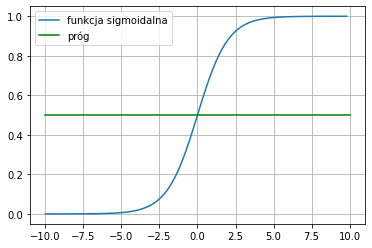

In [8]:
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.plot(x,sig)

x1, y1 = [-10, 10], [0.5, 0.5]
plt.plot(x1, y1, 'g')

plt.grid()
plt.legend(["funkcja sigmoidalna", "próg"])
plt.show()